# 2 Решающие деревья

[1. Статья от Анатолия Карпова](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)

[2. Youtube от Анатолия Карпова](https://www.youtube.com/watch?v=-dCtJjlEEgM)

[3. Наглядная визуализация решающих деревьев](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

[4. Статья на хабре](https://habr.com/ru/company/ods/blog/322534/#kak-stroitsya-derevo-resheniy)

Основные понятия  по теме дерево решений:
 

+ [Entropy and Information gain](https://www.youtube.com/watch?v=IPkRVpXtbdY)
+ [Train / test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
+ [K-fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
+ [Hyper parameters and Grid search](https://scikit-learn.org/stable/modules/grid_search.html)

**Дерево решений** - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете *Information gain*. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать *кросс-валидацию*. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.


## 2.1 Обучение модели в sklearn

[Документация DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# настройка размера графиков
plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


[Альтернативная Визуализация](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

In [4]:
# создаем модель
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
# Y - целевая переменная (требуется предсказать), X_1 и X_2 - признаки (фичи)
X = data[['X_1', 'X_2']]
y = data['Y']

In [6]:
# обучаем модель
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

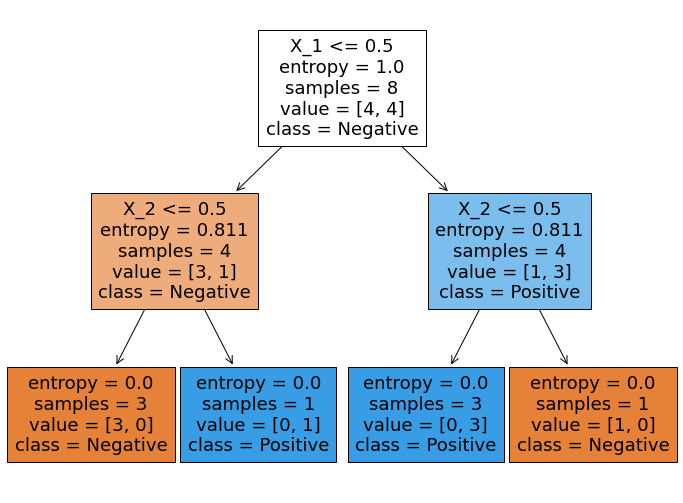

In [7]:
# визуализация дерева решений
tree.plot_tree(clf, filled=True, feature_names=list(X),
               class_names=['Negative', 'Positive'])
plt.show()

## 2.2 Энтропия

[Объяснение энтропии на Youtube](https://www.youtube.com/watch?v=KMEqfb6KO0c)

$$E = -\sum_{i=1}^n p_i*log_{2}p_i$$

Для предыдущей задачи: $E = -\sum_{i=1}^2 1/2*log_{2}1/2 -\sum_{i=1}^2 1/2*log_{2}1/2 = -\sum_{i=1}^2 *log_{2}1/2 = 1$

Если все значения в листе одинаковые, то неопределенность равна 0: $E = -1 * log_{2}1 - 0 * log_{2}0 = 1*0 - 0*1 = 0$

## Information Gain

Цель дерева решений снизить неопределенность (энтропию) в данных путем последовательного разделения данных по некоторому условию

Допустим у нас есть данные с несколькими признаками. Чтобы определить по какому признаку совершать сплит, дерево решений последовательно берет каждый признак и разделяет данные по этому признаку и подсчитывает *Information Gain* для каждого разделения. А далее выбирается тот сплит у которого Information Gain наибольший

🔑 Дерево решений совершает разделение данных по фиче у которой наибольшее значение **Information Gain**

$$IG = E(Y) - E(Y|X)$$

$E(Y)$ - энтропия в корне

$E(Y|X)$ - условная энтропия

$$E(Y|X) = n_0/N * E_0 +  n_1/N * E_1 $$

$n_0, n_1$ - выборки после разделения (для двух классов это левый и правый лист идущие от корня)

$n_0 + n_1 = N$ - Всего элементов до разделения

$E_0, E_1$ - энтропия листов, полученнх при разделении


## Пример. Собачки и котики🐶🐱

In [8]:
pets_data = pd.read_csv('Data/dogs.csv')
pets_data

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


In [9]:
pets_data2 = pd.read_csv('Data/cats.csv')
pets_data2.drop('Unnamed: 0', axis=1, inplace=True)
pets_data2

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [10]:
def entropy(*args):
    E = sum([p*np.log2(p) for p in args])
    return -round(E, 2)

In [11]:
entropy(4/10, 6/10)

0.97

In [12]:
entropy(1/5, 4/5)

0.72

Заморочился написать класс для простенкой задачи по вычислению IG 🤯

In [13]:
class MyDesicionTree:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.y_size = self.y.size
        self.total_entropy = self.entropy(self.y)
        self.entropies = {self.y.name: self.total_entropy}
        
    def calculate_entropy(self):
        for label, feature in self.X.iteritems():
            split_by_one = feature[feature == 1]
            split_by_zero = feature[feature == 0]
            splitting_y_by_one = self.y.iloc[split_by_one.index]
            splitting_y_by_zero = self.y.iloc[split_by_zero.index]
            self.entropies[label] = {'entropy_one': self.entropy(splitting_y_by_one),
                               'entropy_zero': self.entropy(splitting_y_by_zero),
                               'count_one_zero': (split_by_one.size, split_by_zero.size)}

    def entropy(self, feature):
        probabalitys = feature.value_counts()/feature.size
        return -round(probabalitys.apply(lambda x: x*np.log2(x)).sum(), 2)
    
    
    def information_gain(self, feature):
        return round(self.total_entropy - self.entropies[feature]['count_one_zero'][0] / self.y_size \
    * self.entropies[feature]['entropy_one'] + self.entropies[feature]['count_one_zero'][1] / self.y_size \
    * self.entropies[feature]['entropy_zero'], 2)
    
    
    def calculate_IG(self):
        for feature in self.X:
            print(self.information_gain(feature))
    

In [14]:
X = pets_data2.drop('Вид', axis=1)
y = pets_data2['Вид']

mytree = MyDesicionTree(X, y)
mytree.calculate_entropy()
mytree.calculate_IG()

0.08
0.61
0.97


## 2.3 Титаник

In [15]:
titanic_train_data = pd.read_csv('Data/train.csv')
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_test_data = pd.read_csv('Data/test.csv')
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<BarContainer object of 2 artists>

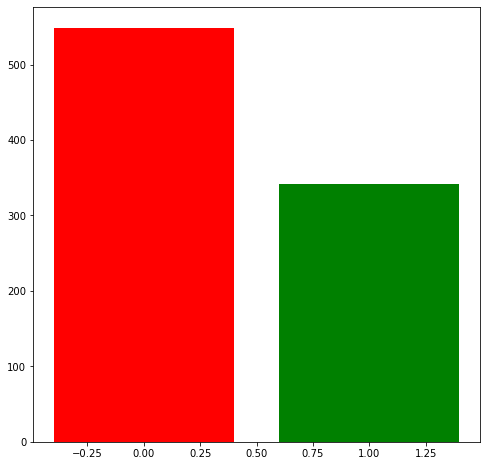

In [17]:
plt.figure(figsize=(8, 8))
plt.bar(titanic_train_data['Survived'].value_counts().index, titanic_train_data['Survived'].value_counts(),\
        color=['r', 'g'])

In [18]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Дропаем Cabin так как в ней много пропущенных значений, Survived - так как ее предсказываем,
# остальные фичи не несут смысловой нагрузки
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin', 'Name'], axis=1)
y = titanic_train_data['Survived']

In [20]:
# Номенативные переменные конвертируем в числовые
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
# заполняем пропущенные данные медианой
X = X.fillna({'Age': X.Age.median()})

In [22]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

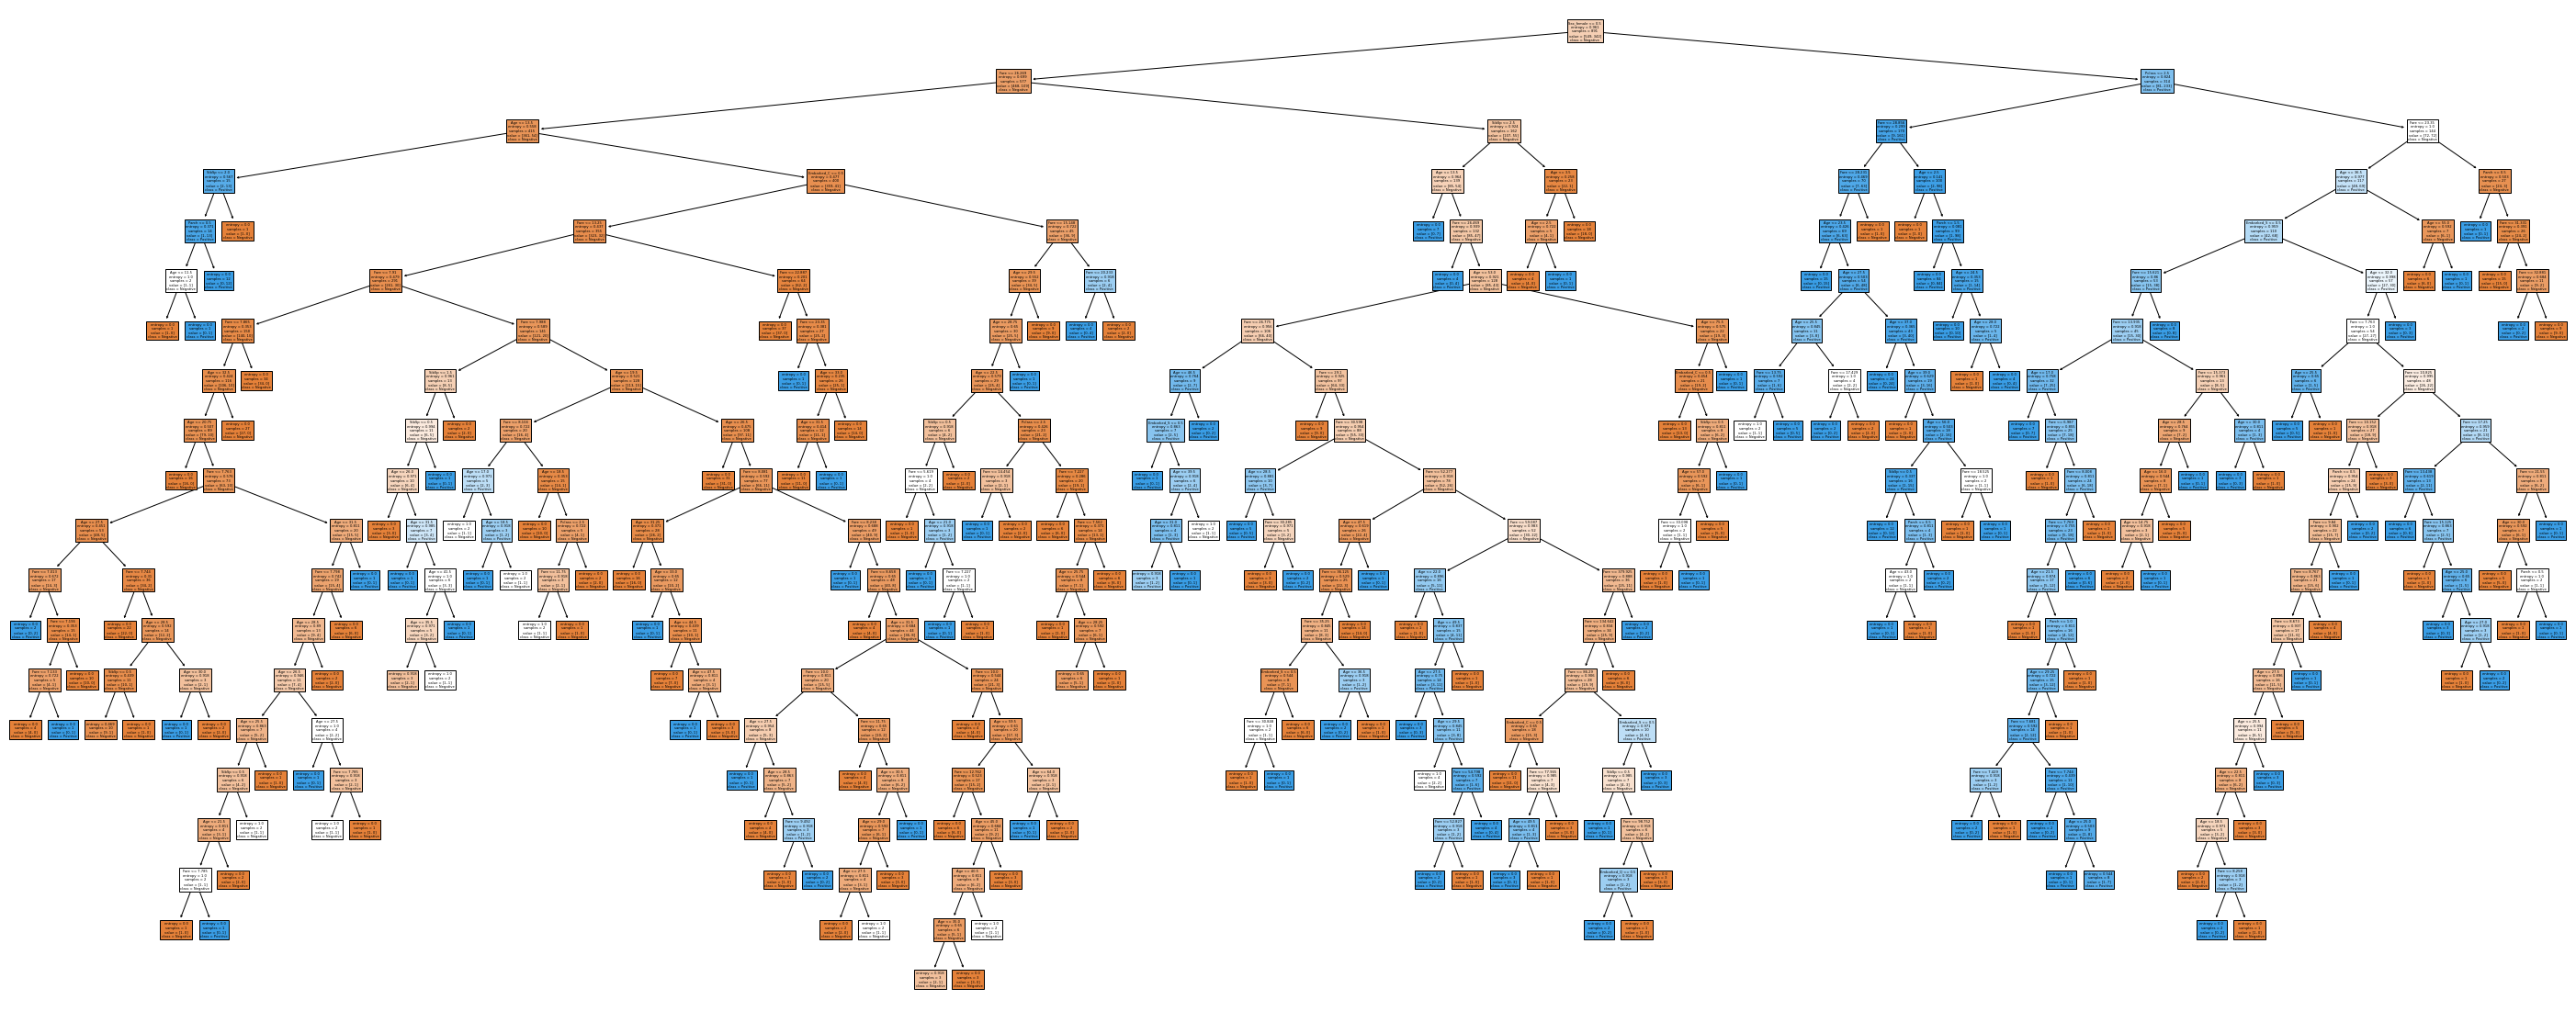

In [23]:
plt.figure(figsize=(50, 20))
tree.plot_tree(clf, filled=True, feature_names=list(X), class_names=['Negative', 'Positive'])
plt.show()

[Спасибо за конвертацию в картинку - комментарий Эрик Мартиросов](https://stepik.org/lesson/223852/step/7?discussion=1028550&unit=196663)

In [24]:
import pydotplus

export = tree.export_graphviz(clf,feature_names=list(X),filled=True) # наше дерево

graph = pydotplus.graph_from_dot_data(export)  
graph.write_pdf("titanic.pdf")
graph.write_png("titanic.png")

True

[Спасибо за масштабирование - комментарий Донат Горбачев](https://stepik.org/lesson/223852/step/7?discussion=3603446&unit=196663)

In [25]:
def draw_graphviz(graph):
    import re
    import ipywidgets as widgets
    from IPython.display import SVG, HTML
    from graphviz import Source
    
    graph = Source(graph)
    image = graph.pipe(format="svg")
    svg = SVG(image)
    svg_data = svg.data
    svg_data = re.sub(
        r'<svg xmlns=\"http://www\.w3\.org/2000/svg\" xmlns:xlink=\"http://www\.w3\.org/1999/xlink\" width=\"\d+pt\" height=\"\d+pt\"',
        '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="100%" height="100%"',
        svg_data,
    )
    
    @widgets.interact(scale=widgets.IntSlider(min=30, max=500, step=1, value=100, description="Scale (%):", continuous_update=False))
    def _draw_svg(scale):
        return HTML('<div style="width: {width}%;">{svg}</div>'.format(width=scale, svg=svg_data))
    return _draw_svg

In [26]:
graph = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
draw_graphviz(graph)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=500, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>

## 2.4 Борьба с переобучением

Дерево решений не ставит перед собой задачи найти закономерност в данных, а разделяет данные пока все данные не будут четко разделены по классам, поэтому дерево разрастается глубоко, что приводит к переобучению

### 2.4.1 Разбиение датасета

🔑 **train dataset** используется для тренировки модели, **validation** - для её проверки, **test dataset** выступает как ещё один уровень проверки, которая происходит на не показанных модели ранее данных

Инсайты:
+ Чем сложнее закономерности в данных, тем более сложная нужна модель для их поиска
+ Уменьшить переобученность поможет больший объём данных
+ Переобученная модель - модель, погрязшая в особенностях тренировочного датасэта, вместо вникания в общие закономерности
+ Упрощение модели препятствует переобучению

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Тестовый и тренировочный score (процент правильных ответов) характерезует переобученность модели

**Accuracy** - процент правильных ответов

In [29]:
# Точность модели на тренировочных данных - процент правильных ответов
clf.score(X_train, y_train)

0.9798657718120806

In [30]:
#Точность модели на тестовых данных
clf.score(X_test, y_test)

0.7728813559322034

Если глубину дерева ограничить, то точность на тестовой выборке измениться

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
clf.score(X_train, y_train)

0.8238255033557047

In [33]:
clf.score(X_test, y_test)

0.8203389830508474

### Визуализация точности модели от глубины дерева решения

In [34]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [35]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

<AxesSubplot:xlabel='max_depth'>

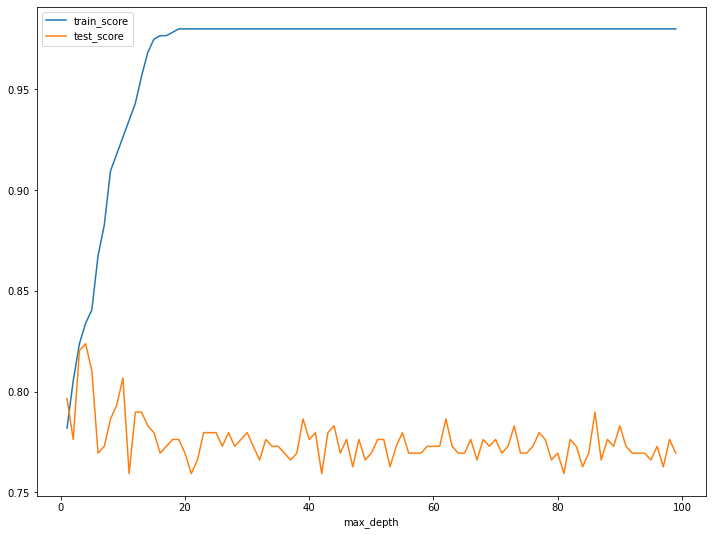

In [36]:
# визуализация 1 способ
scores_data.plot(x='max_depth', y=['train_score', 'test_score'])

Преобразование датафрейма для построения в seaborn, для этого нужна одна колонка по y

<AxesSubplot:xlabel='max_depth', ylabel='score'>

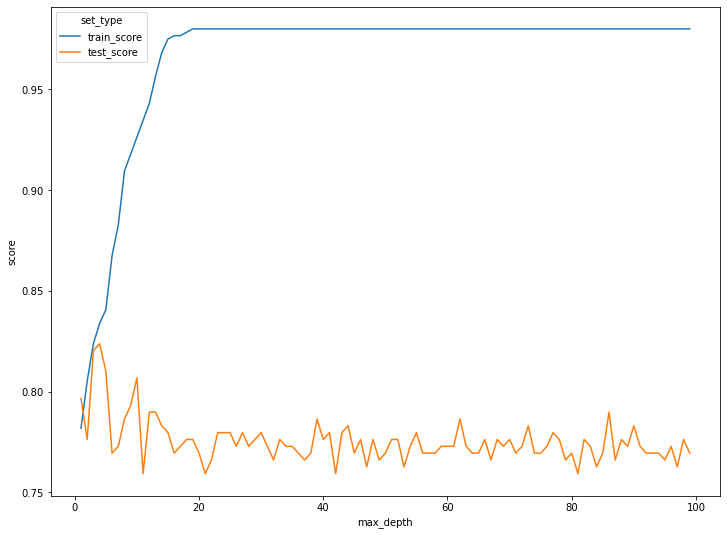

In [37]:
# визуализация 2 способ
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], \
                           value_vars = ['train_score','test_score'], var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

### 2.4.2 Кросвалидация

[Sklearn документация](https://scikit-learn.org/stable/modules/cross_validation.html)

Концепция кроссвалидации - данные сплитим заданное количество раз на тренировочные и тестовые. Таким образом все данные побывают в тестовой и тренировочных выборках. Усредненный score по всем выборкам наш результат. 

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [40]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [41]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [42]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.798711


<AxesSubplot:xlabel='max_depth', ylabel='score'>

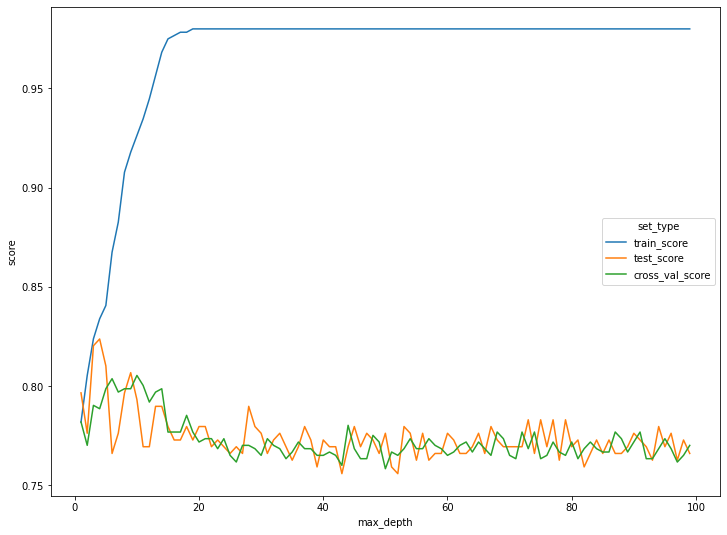

In [43]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], \
                           value_vars = ['train_score','test_score', 'cross_val_score'], \
                           var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [44]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.798711
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.798683
207,10,cross_val_score,0.805392


Построим модель с наибольшим score соответсвующем глубине дерева 10

In [45]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8

### Задание 1

In [46]:
train_iris = pd.read_csv('Data/train_iris.csv')
train_iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [47]:
test_iris = pd.read_csv('Data/test_iris.csv')
test_iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [48]:
X_train_iris = train_iris.drop(['Unnamed: 0', 'species'], axis=1)
y_train_iris = train_iris.species

In [49]:
X_test_iris = test_iris.drop(['Unnamed: 0', 'species'], axis=1)
y_test_iris = test_iris.species

In [50]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
rs = np.random.seed(0)

In [51]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(random_state=rs, criterion='entropy', max_depth=max_depth)
    clf.fit(X_train_iris, y_train_iris)
    train_score = clf.score(X_train_iris, y_train_iris)
    test_score = clf.score(X_test_iris, y_test_iris)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

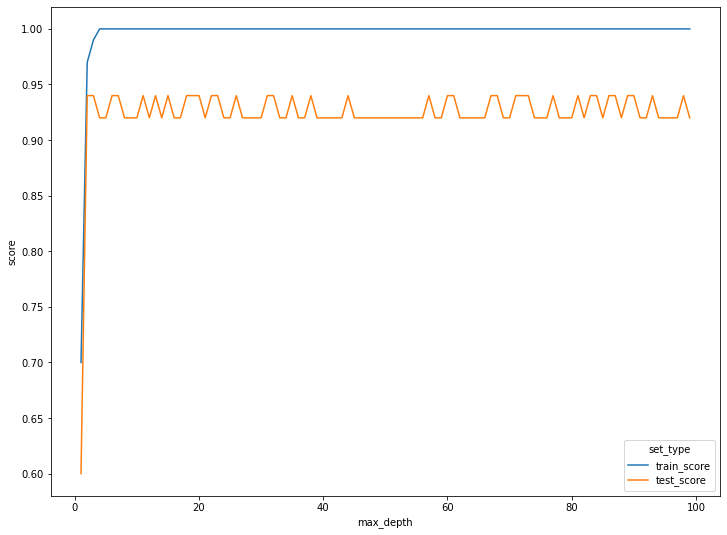

In [52]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score'], var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

### Задание 2

In [53]:
cat_and_dogs = pd.read_csv('Data/dogs_n_cats.csv')
cat_and_dogs.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [54]:
X = cat_and_dogs.drop('Вид', axis=1)
y = cat_and_dogs.Вид

In [55]:
clf = tree.DecisionTreeClassifier(random_state=rs, criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [56]:
test = pd.read_json('Data/dataset_209691_15.txt')
test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,26,31.2,1,1,0
1,18,21.6,1,1,0
2,32,38.4,1,1,0
3,26,31.2,1,1,0
4,15,18.0,1,1,0


In [57]:
y_test_dogs = clf.predict(test)

In [58]:
Seria = pd.Series(y_test_dogs)
Seria.value_counts()

собачка    51
котик      49
dtype: int64

## 2.5 Метрики качества модели

Высокий скор **accuracy** не всегда говорит о качестве модели в случае неравномерного распределения классов.

[Хабр метрики](https://habr.com/en/company/ods/blog/328372/)

[Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

**Precision (точность)** - отвечает на вопрос на сколько хорошо получается находить положительные классы не переплачивая за это ложными срабатываниями

**Recall (полнота)** - отвечает на вопрос на сколько в целом получается найти положительные примеры, то есть правда ли что нашли всех представителей класса

[F-метрика](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

![Метрики](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

In [59]:
from sklearn.metrics import precision_score, recall_score

## 2.6 Гиперпараметры модели DecisionTreeClassifier

+ `max_depth` - Максимальное число уровней дерева (максимальная длина пути от корня до листа)
+ `min_impurity_decrease` - Минимальное снижение "нечистоты" (смешения классов) узла при разделении, чтобы разделение произошло
+ `min_samples_leaf` - Минимальное число образцов в листьях (при получившемся значении ниже разделение не будет произведено)
+ `min_samples_split` - Минимальное число образцов в узле, чтобы его можно было разделить на 2

🔑Чем больше значение `min_samples_split`, тем меньше тенденция к переобучению

🔑Малая глубина дерева препятствует переобучению

## 2.7 Автоматический подбор гиперпараметров модели

### 2.7.1 GridSearchCV

[Документация по GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV)

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.

Для этой цели существует класс **GridSearchCV**, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих **кросс-валидацию**. После этого в аттрибуте `.best_estimator_` храниться модель с лучшими параметрами (атрибут `.best_params_`).

Это применимо не только к деревьям, но и к другим моделям *sklearn*.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [62]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

Определим лучшие параметры для модели

In [63]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [64]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [65]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [66]:
best_clf = grid_search_cv_clf.best_estimator_

In [67]:
best_clf.score(X_test, y_test)

0.7661016949152543

Определим precision и recall

In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
y_pred = best_clf.predict(X_test)

In [70]:
precision_score(y_test, y_pred)

0.7931034482758621

In [71]:
recall_score(y_test, y_pred)

0.575

Классификатор определяет выжил или нет по отсечки вероятности 0.5

In [72]:
# вероятности
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob[:10, :]

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ]])

<AxesSubplot:>

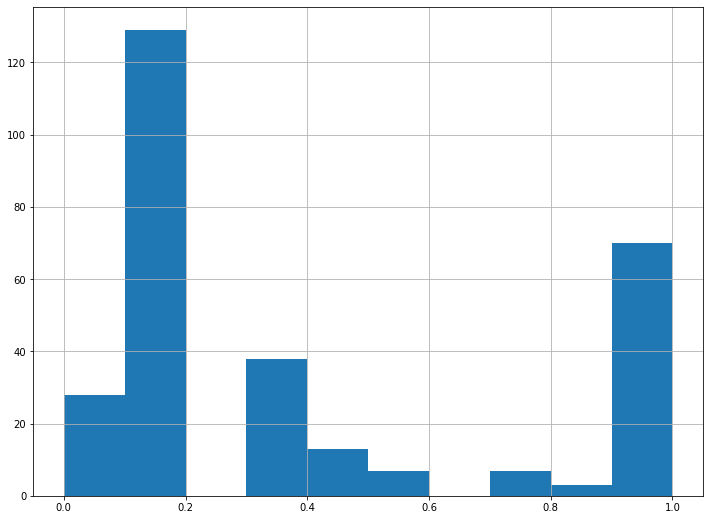

In [73]:
pd.Series(y_predicted_prob[:, 1]).hist()

Для увеличения PRECISION сделаем отсечку для выживших с вероятностью 0.9

In [74]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

In [75]:
precision_score(y_test, y_pred)

0.8714285714285714

In [76]:
recall_score(y_test, y_pred)

0.5083333333333333

### 2.7.2 RandomizedSearchCV

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

+ `RandomizedSearchCV` работает быстрее `GridSearchCV` так как перебирает не все из возможных комбинаций параметров
+ Ни `GridSearchCV`, ни `RandomizedSearchCV` не гарантируют получение самой лучшей модели из возможных
+ `GridSearchCV` находит наилучшее значение параметров модели из возникающих в результате комбинации переданных параметров

## 2.8 ROC кривая

Часто в литературе её определяют как кривую зависимости TPR от FPR при варьировании порога для бинаризации.

[Документация scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

[Объяснение на англ на ютубе](https://www.youtube.com/watch?v=4jRBRDbJemM)

[Статья про ROC анализ](https://loginom.ru/blog/logistic-regression-roc-auc)

[Статья про AUC ROC (площадь под кривой ошибок)](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)

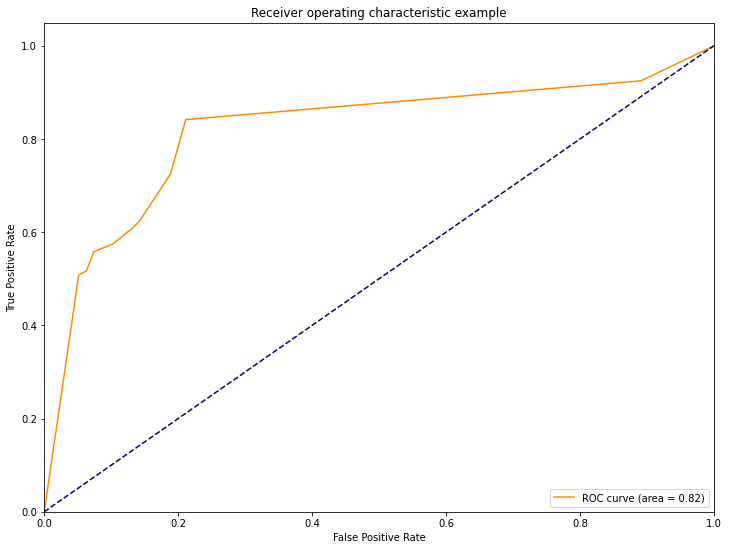

In [77]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## *Практика

In [78]:
df = pd.read_csv('Data/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     238 non-null    int64
 1   exang   238 non-null    int64
 2   num     238 non-null    int64
dtypes: int64(3)
memory usage: 5.7 KB


In [80]:
X = df[['sex', 'exang']]
y = df['num']

In [81]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [82]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

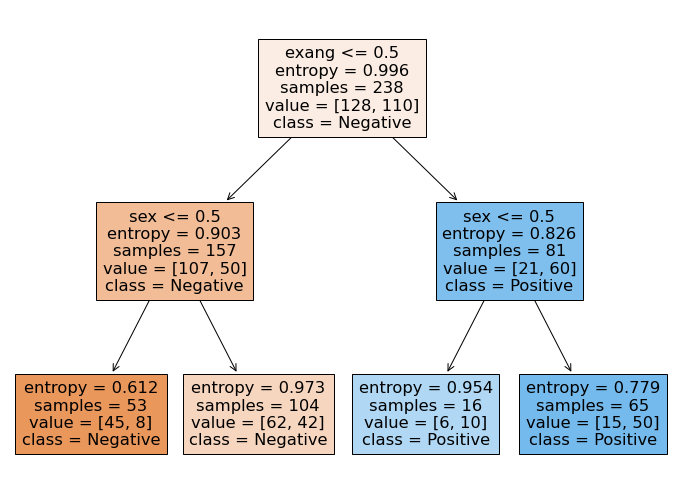

In [83]:
tree.plot_tree(clf, filled=True, feature_names=list(X),
               class_names=['Negative', 'Positive'])
plt.show()

In [84]:
clf.tree_.children_left

array([ 1,  2, -1, -1,  5, -1, -1], dtype=int64)

In [85]:
clf.tree_.feature

array([ 1,  0, -2, -2,  0, -2, -2], dtype=int64)

In [86]:
clf.tree_.n_node_samples

array([238, 157,  53, 104,  81,  16,  65], dtype=int64)

In [87]:
clf.tree_.impurity

array([0.99587   , 0.90271134, 0.61219613, 0.97315604, 0.82562653,
       0.954434  , 0.77934984])

In [88]:
n0 = clf.tree_.n_node_samples[0]
n1 = clf.tree_.n_node_samples[1]
n2 = clf.tree_.n_node_samples[4]
print(n0, n1, n2)

238 157 81


In [89]:
s0 = clf.tree_.impurity[0]
s1 = clf.tree_.impurity[1]
s2 = clf.tree_.impurity[4]
print(s0, s1, s2)

0.9958699965528488 0.9027113410339267 0.8256265261578954


In [90]:
IG = s0 - (n1/n0*s1 + n2/n0*s2)
IG

0.11939340343891591

# 3 Random Forest

"Когда мы возьмем много частных мнений и объединим их в одно, то вместе они смогут породить правильное решение" 

                                                                                                     (А.Карпов)

🔑 Каждое дерево работает по алгоритму **Decision tree**

🔑Каждое дерево в лесу получает **случайный поднабор данных**, при этом по конфигурации деревья одинаковые (параметры модели одинаковые у каждого дерева)

🔑Предсказание леса - **усреднённые предсказания деревьев**

[эксплоративный анализ (EDA)](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [93]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [94]:
# набор фичей по которым делались сплиты чтобы добиться максимального снижения энтропии данных                                
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.305653
5,Sex_female,0.227715
4,Fare,0.147568
1,Age,0.106094
0,Pclass,0.092896
2,SibSp,0.032463
9,Embarked_S,0.032433
3,Parch,0.028339
7,Embarked_C,0.015511
8,Embarked_Q,0.011328


### Задание

In [95]:
heart = pd.read_csv('Data/heart2.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
X = heart.drop('target', axis=1)
y = heart['target']

In [97]:
np.random.seed(0)

clf_rf = RandomForestClassifier(10, max_depth=5)
clf_rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

Наиболее важные признаки при разделение данных храняться в атрибуте `feature_importances_`

<AxesSubplot:>

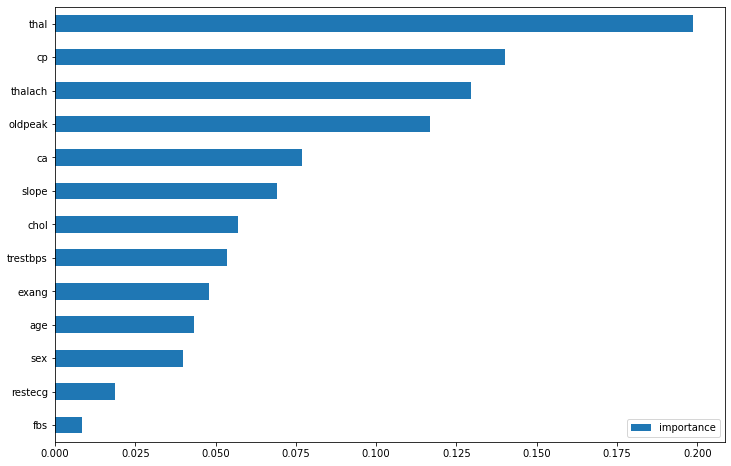

In [98]:
imp = pd.DataFrame(clf_rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# Дополнительные материалы

От Анатолия Карпова:

[1. Визуализация работы нейронных сетей](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.39892&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

[2. Объяснение обучения ANN](https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e)

[3. Введение в ANN](https://blog.goodaudience.com/artificial-neural-networks-explained-436fcf36e75)

[4. Краткий обзор некоторых видов сетей](https://medium.datadriveninvestor.com/neural-networks-explained-6e21c70d7818)

[5. Объяснение работы свёрточных нейронных сетей](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1). Эта же статья [на русском](https://neurohive.io/ru/osnovy-data-science/glubokaya-svertochnaja-nejronnaja-set/)

Из комментариев:

[1. Курс лекций на Ютубе про deep learning](https://www.youtube.com/watch?v=_q46x0tq2FQ)

[2. Статья на простом языке о многообразии ML, обзор популярных алгоритмов](https://vas3k.ru/blog/machine_learning/)

[3. Введение в Deep Learning | лекция на ютубе](https://www.youtube.com/watch?v=40mnpYTPpJg)


# Практика на случайный лес

## 1 Съедобные грибы

In [99]:
df = pd.read_csv('Data/training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [100]:
X = df.drop('class', axis=1)
y = df['class']

In [101]:
rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': range(10, 51, 10),
            'max_depth': range(1, 13, 2),
            'min_samples_leaf': range(1, 8),
            'min_samples_split': range(2, 10, 2)}
grid_search_cv_rf = GridSearchCV(rf, parametrs, cv=3, n_jobs=-1)
grid_search_cv_rf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [102]:
grid_search_cv_rf.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [103]:
best_params = grid_search_cv_rf.best_params_
best_params

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [104]:
clf_rf = RandomForestClassifier(**best_params, random_state=0)
clf_rf.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [105]:
clf_rf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

<AxesSubplot:>

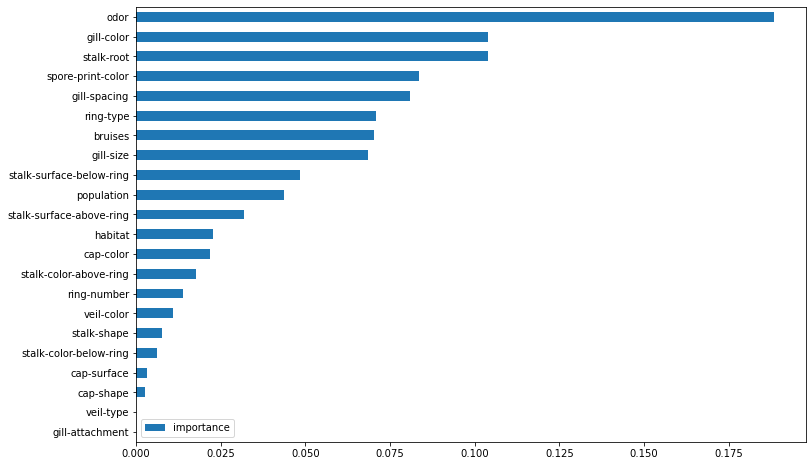

In [106]:
imp = pd.DataFrame(clf_rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [107]:
X_test = pd.read_csv('Data/testing_mush.csv')
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [108]:
predictions = clf_rf.predict(X_test)
predictions

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [109]:
pd.Series(predictions).value_counts()

0    1055
1     976
dtype: int64

In [110]:
np.bincount(predictions)[1]

976

In [111]:
y_test = pd.read_csv('Data/testing_y_mush.csv')
y_test.head()

,class
0,0
1,0
2,1
3,1
4,1


In [112]:
y_test['class'].value_counts()

0    1055
1     976
Name: class, dtype: int64

In [113]:
from sklearn.metrics import plot_confusion_matrix

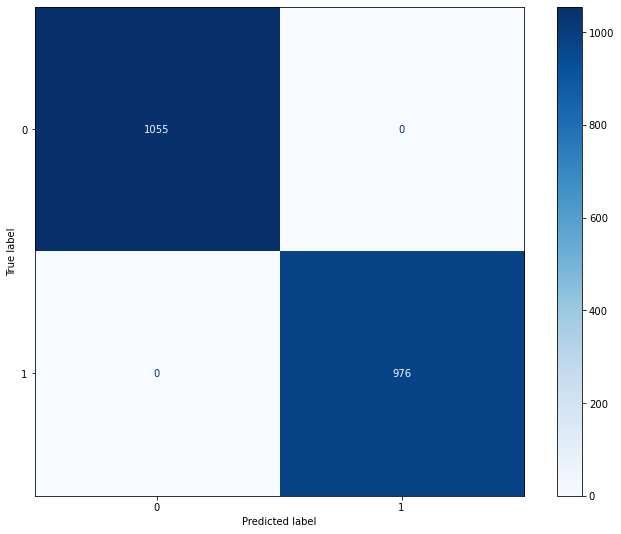

In [114]:
plot_confusion_matrix(clf_rf, X_test, y_test, cmap=plt.cm.Blues)

## 2 Жуки атакуют

In [115]:
bags = pd.read_csv('Data/invasion.csv')
bags.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [116]:
bags['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [117]:
X_train = bags.drop('class', axis=1)
y_train = bags['class']

In [118]:
X_test = pd.read_csv('Data/operative_information.csv')
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [119]:
clf = RandomForestClassifier(random_state=0)

In [120]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [121]:
prediction = clf.predict(X_test)
prediction

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [122]:
pd.Series(prediction).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

<AxesSubplot:>

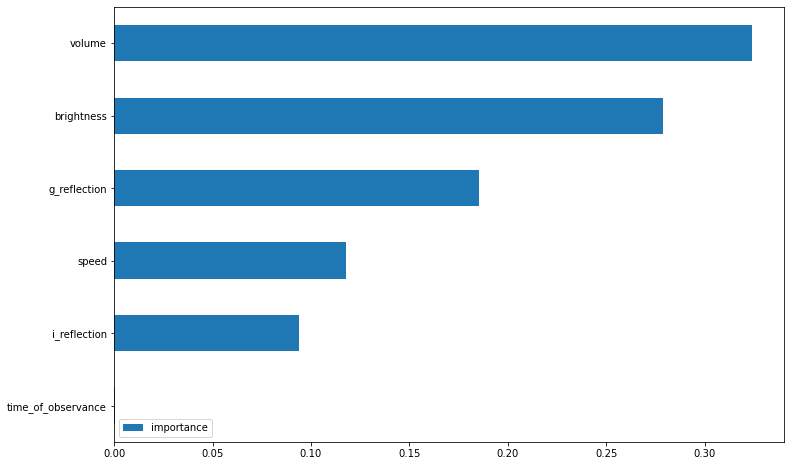

In [123]:
imp = pd.DataFrame(clf.feature_importances_, index=X_test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

## 3 Данне об опасности разных регионов космоса

In [124]:
space = pd.read_csv('Data/space_can_be_a_dangerous_place.csv')
space.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [125]:
space.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


<AxesSubplot:>

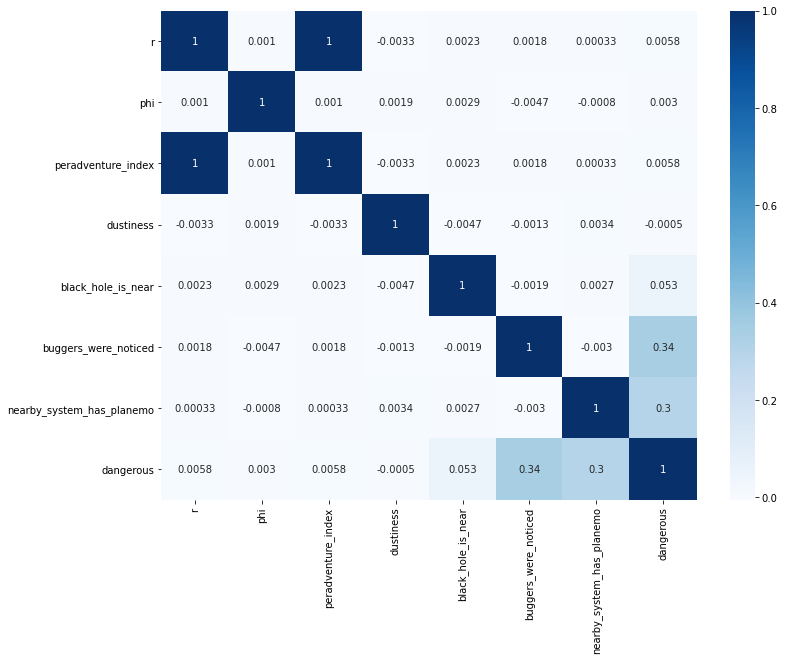

In [126]:
sns.heatmap(space.corr(), annot=True, cmap=plt.cm.Blues)

# Нейроэволюция

[Описание NEAT и иллюстрация его использования на модели, играющей в Flappy Bird](https://web.archive.org/web/20181204121810/medium.com/datadriveninvestor/neuroevolution-neat-algorithm-and-my-neat-b83c5174d8b0)

[Видео с игрой моделей, эволюционирующих по NEAT'у](https://www.youtube.com/watch?v=aeWmdojEJf0)

[Исходная статья](http://nn.cs.utexas.edu/downloads/papers/stanley.ec02.pdf)

[Решение задачки с Flappy Bird](https://habr.com/ru/post/217645/)

[Ютуб видео с игрой](https://www.youtube.com/watch?v=-nYo_sThziU)

# Заключение

Нужно отметить, что, как говорилось, разные методы машинного обучения лучше подходят к различным задачам. Вдобавок к этому ML не всегда является оптимальным подходом - при наличии чёткого аналитического решения нужно использовать его, так как обычно оно требует меньше ресурсов и полностью проработано (понятно почему получается такой результат, меньше ошибка). Например, рассчитывать пройденное расстояние, зная скорость и время лучше по формуле, чем обучая модель на тестовых данных)

# Бонусный урок - трюки в pandas

## Итерирование

In [127]:
movie = pd.read_csv('Data/movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [128]:
genres = movie[['movie_title', 'genres']]
genres = genres.head() # оставим только 5 строк

In [129]:
for i in genres:
    print(i)

movie_title
genres


Классические питоновские циклы не эффективны

In [130]:
for i in genres.values:
    print(i)

['Avatar\xa0' 'Action|Adventure|Fantasy|Sci-Fi']
["Pirates of the Caribbean: At World's End\xa0" 'Action|Adventure|Fantasy']
['Spectre\xa0' 'Action|Adventure|Thriller']
['The Dark Knight Rises\xa0' 'Action|Thriller']
['Star Wars: Episode VII - The Force Awakens\xa0            '
 'Documentary']


In [131]:
for row in genres.values:
    for value in row:
        print(value)

Avatar 
Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End 
Action|Adventure|Fantasy
Spectre 
Action|Adventure|Thriller
The Dark Knight Rises 
Action|Thriller
Star Wars: Episode VII - The Force Awakens             
Documentary


Более эффективный прием применение `iterrows()` и `iteritems()`

In [132]:
def reversator(value):
    return value[::-1]

In [133]:
for row in genres.iterrows():
    print(row)

(0, movie_title                            Avatar 
genres         Action|Adventure|Fantasy|Sci-Fi
Name: 0, dtype: object)
(1, movie_title    Pirates of the Caribbean: At World's End 
genres                          Action|Adventure|Fantasy
Name: 1, dtype: object)
(2, movie_title                     Spectre 
genres         Action|Adventure|Thriller
Name: 2, dtype: object)
(3, movie_title    The Dark Knight Rises 
genres                Action|Thriller
Name: 3, dtype: object)
(4, movie_title    Star Wars: Episode VII - The Force Awakens    ...
genres                                               Documentary
Name: 4, dtype: object)


In [134]:
for i, row in genres.iterrows():
    print(row.map(reversator))

movie_title                             ratavA
genres         iF-icS|ysatnaF|erutnevdA|noitcA
Name: 0, dtype: object
movie_title     dnE s'dlroW tA :naebbiraC eht fo setariP
genres                          ysatnaF|erutnevdA|noitcA
Name: 1, dtype: object
movie_title                      ertcepS
genres         rellirhT|erutnevdA|noitcA
Name: 2, dtype: object
movie_title     sesiR thginK kraD ehT
genres                rellirhT|noitcA
Name: 3, dtype: object
movie_title                 snekawA ecroF ehT - IIV edosipE :...
genres                                               yratnemucoD
Name: 4, dtype: object


In [135]:
for i, col in genres.iteritems():
    print(col.map(reversator))

0                                               ratavA
1             dnE s'dlroW tA :naebbiraC eht fo setariP
2                                              ertcepS
3                                sesiR thginK kraD ehT
4                 snekawA ecroF ehT - IIV edosipE :...
Name: movie_title, dtype: object
0    iF-icS|ysatnaF|erutnevdA|noitcA
1           ysatnaF|erutnevdA|noitcA
2          rellirhT|erutnevdA|noitcA
3                    rellirhT|noitcA
4                        yratnemucoD
Name: genres, dtype: object


## Альтернатива итерации

In [136]:
budget=movie[['budget', 'duration']]
budget = budget.head()
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


### - applymap()

Применяет переданную функцию к каждой ячейки датафрейма

In [137]:
budget.applymap(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


### - apply()

Если нужно преминить функцию к колонке или строке

In [138]:
budget.apply(np.mean, axis=0)

budget      2.580000e+08
duration    1.647500e+02
dtype: float64

In [139]:
def mm(col):
    return np.mean(col) + 1

In [140]:
budget.apply(mm)

budget      2.580000e+08
duration    1.657500e+02
dtype: float64

### - transform()

Такая же как `apply()`, но не приеняет аггрегирующие функции

In [141]:
budget.transform(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


Оптимальнее вызывать функцию сразу без `apply()`

In [142]:
budget.mean() + 1

budget      2.580000e+08
duration    1.657500e+02
dtype: float64

## Время выполнения кода

In [143]:
iris = pd.read_csv('Data/iris2.csv')
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [144]:
%%timeit
iris.describe().loc['mean']

16.9 ms ± 549 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [145]:
%%timeit
iris.mean(axis=0)

610 µs ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [146]:
%%timeit
iris.apply('mean')

665 µs ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [147]:
%%timeit
iris.apply(np.mean)

1.18 ms ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Временные ряды

In [148]:
stock=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv',\
                  index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [149]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [150]:
stock['2010-02':'2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


### - resample()

Может разбить на меньшие временные промежутки или сагрегировать данные

In [151]:
stock.resample('2h')

In [152]:
# Теперь строки каждые 2 часа записываются
stock.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [153]:
# среднее за неделю
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


### - rolling()

Оконная функция, применяется функция к куску данных (окну)

In [154]:
stock.rolling(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [155]:
# для заполнения пропущенных значений
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


### - expanding()

Окна не фиксированного значения, а увеличивается по мере обхода датафрейма

In [156]:
stock.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


### - ewm()

Экспонтенциальное окно, предыдущие веса уменьшаются по експоненте

In [157]:
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


### Сглаживание графика

In [158]:
ns=stock['Open'].rolling(20, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

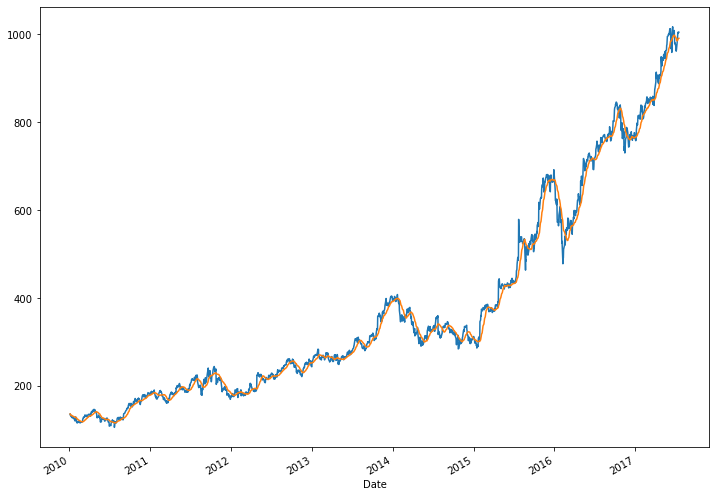

In [159]:
stock['Open'].plot()
ns.plot()

### обращение к дням

In [160]:
stock.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [161]:
stock.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [162]:
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [163]:
stock.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=1896)

In [164]:
stock.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='Date', length=1896)

In [165]:
np.mean(stock.index.dayofyear)

178.00632911392404

In [166]:
stock.index.day.value_counts()

23    65
13    65
9     65
10    65
8     65
11    65
12    65
14    64
7     64
15    63
19    63
17    63
22    63
6     63
28    62
3     62
21    62
16    62
27    62
5     62
2     61
24    61
20    61
18    60
26    60
4     59
1     58
29    58
25    57
30    56
31    35
Name: Date, dtype: int64